In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.preprocessing import MinMaxScaler,StandardScaler


import warnings
warnings.filterwarnings("ignore")



In [2]:
df=pd.read_csv("Boston.csv")
df

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [6]:
df.rename({"medv":"Price"},axis=1,inplace=True)

In [7]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [10]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,Price
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Train Test Split 

In [12]:
x=df.drop("Price",axis=1)
y=df["Price"]

In [13]:
x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [14]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [23]:
x_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666,20.2,349.48,24.91
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307,21.0,395.62,8.47
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666,20.2,2.52,23.29
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.5200,5.836,91.9,2.2110,5,384,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.4640,5.856,42.1,4.4290,3,223,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.4350,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.7400,6.629,94.6,2.1247,24,666,20.2,109.85,23.27


In [24]:
y_train

477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: Price, Length: 404, dtype: float64

In [25]:
x_test

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296,16.6,395.50,9.04
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254,17.6,396.90,3.53
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,18.81100,0.0,18.10,0,0.597,4.628,100.0,1.5539,24,666,20.2,28.79,34.37
436,14.42080,0.0,18.10,0,0.740,6.461,93.3,2.0026,24,666,20.2,27.49,18.05
411,14.05070,0.0,18.10,0,0.597,6.657,100.0,1.5275,24,666,20.2,35.05,21.22
86,0.05188,0.0,4.49,0,0.449,6.015,45.1,4.4272,3,247,18.5,395.99,12.86


In [26]:
y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
412    17.9
436     9.6
411    17.2
86     22.5
75     21.4
Name: Price, Length: 102, dtype: float64

Model Training

In [54]:
knn_reg = KNeighborsRegressor(n_neighbors=5,p=1)
knn_reg.fit(x_train, y_train)

KNeighborsRegressor(p=1)

Evaluation 

In [55]:
y_predict_testing=knn_reg.predict(x_test)
y_predict_testing

array([24.5 , 30.26, 13.46, 28.  , 17.16, 26.12, 19.74, 15.92, 19.8 ,
       21.18, 23.38, 19.8 , 12.42, 21.34, 23.06, 22.18, 19.04, 14.7 ,
       35.14, 11.42, 27.96, 29.34, 16.82, 19.58, 18.88, 22.78, 23.04,
       11.46, 23.1 , 22.5 , 24.1 , 23.44, 10.3 , 31.48, 20.26, 21.12,
       23.7 , 19.58, 22.52, 27.96, 21.5 , 28.6 , 38.16, 21.5 , 24.84,
       12.36, 16.82, 28.  , 19.8 , 22.68, 22.26, 36.74, 17.96, 21.44,
       39.94, 21.38, 12.5 , 33.72, 21.66, 21.96, 22.5 , 38.82, 29.1 ,
       16.28, 30.16, 20.64, 12.26, 23.36, 35.04, 13.52, 20.32, 22.52,
       14.82, 21.34, 22.46,  8.76, 19.68, 38.16, 10.7 , 14.12, 22.88,
       15.96, 24.56, 12.24, 20.3 , 31.98, 14.16, 21.94, 26.04, 17.86,
       24.34, 14.7 , 17.48, 21.06, 26.72, 17.98, 29.54,  8.7 , 10.76,
        8.7 , 21.36, 22.46])

In [56]:
y_predict_testing[:5]

array([24.5 , 30.26, 13.46, 28.  , 17.16])

In [57]:
y_test[:5]

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: Price, dtype: float64

Testing Data Evaluation 

In [58]:
mse=mean_squared_error(y_test,y_predict_testing)
print("Mean squared error:",mse)
rmse=np.sqrt(mse)
print("Root mean squared error:",rmse)
mae=mean_absolute_error(y_test,y_predict_testing)
print("Mean absolute error:",mae)
r_squared=r2_score(y_test,y_predict_testing)
print("R2 Score is :",r_squared)

Mean squared error: 22.02435294117647
Root mean squared error: 4.693011074052188
Mean absolute error: 3.3298039215686273
R2 Score is : 0.6996697566655379


Training Data Evaluation 

In [59]:
y_predict_training=knn_reg.predict(x_train)
mse=mean_squared_error(y_train,y_predict_training)
print("Mean squared Error: ", mse)
rmse=np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)
mae=mean_absolute_error(y_train,y_predict_training)
print("Mean absolute Error: ", mae)
r_squared=r2_score(y_train,y_predict_training)
print("R2 SCore is : ", r_squared)

Mean squared Error:  23.512329702970295
Root Mean Squared Error:  4.8489514024137526
Mean absolute Error:  3.2943069306930695
R2 SCore is :  0.729349505538192


In [60]:
k_values = range(2,21)
list(k_values)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [61]:
r2_train_list = []
for k in k_values:
    knn_reg=KNeighborsRegressor(n_neighbors=k,p=1)
    knn_reg.fit(x_train,y_train)
    r2_training = knn_reg.score(x_train,y_train)
    r2_train_list.append(r2_training)

r2_train_list


[0.8756047377599658,
 0.8009280643714729,
 0.7693830411371629,
 0.729349505538192,
 0.7332867791667685,
 0.7087405125741333,
 0.6888339839128826,
 0.6642760472865272,
 0.6531042240542401,
 0.6250172515195147,
 0.6039764120977615,
 0.5873369523903496,
 0.575633762793898,
 0.5546731649863051,
 0.5379013802893736,
 0.5290972164864668,
 0.5182965554327188,
 0.5052839337635577,
 0.4931182031916955]

In [63]:
r2_testing_list = []
for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=1)
    knn_reg.fit(x_test,y_test)
    r2_testing=knn_reg.score(x_test,y_test)
    r2_testing_list.append(r2_testing)
r2_testing_list

[0.8132778833222004,
 0.7347100348952806,
 0.711449463820527,
 0.6765543904339058,
 0.6142221376049368,
 0.6009259173099357,
 0.5869633248455224,
 0.5867339504375757,
 0.5723112731771541,
 0.5604702348586172,
 0.5497033525850763,
 0.5504158435341909,
 0.5175458901843213,
 0.5022941343322296,
 0.48834770314990217,
 0.4744687001762651,
 0.4527053195427859,
 0.4379928669699725,
 0.4372118612358308]

Text(0.5, 1.0, 'Comparison between R2_Score of Training and Testing Data')

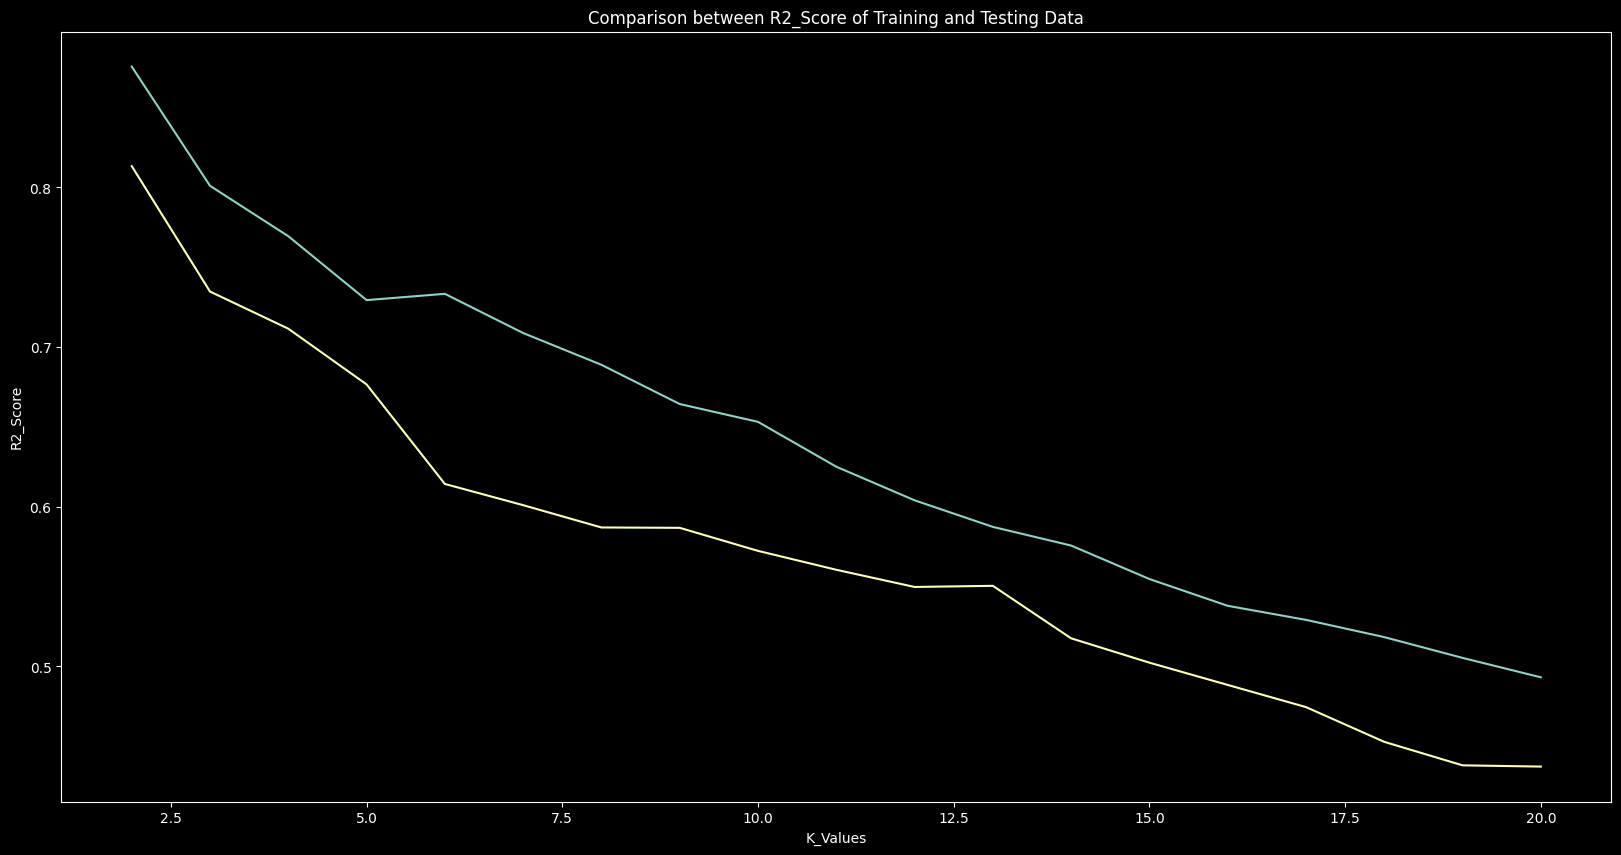

In [69]:
plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list)
plt.plot(k_values,r2_testing_list)
plt.xlabel("K_Values")
plt.ylabel("R2_Score")
plt.title("Comparison between R2_Score of Training and Testing Data")

In [70]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.preprocessing import MinMaxScaler,StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [71]:
df=pd.read_csv("Boston.csv")
df

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [72]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [73]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [74]:
df.rename({"medv":"Price"},axis=1,inplace=True)

In [75]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [77]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [78]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,Price
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Train test split

In [79]:
x=df.drop("Price",axis=1)
y=df["Price"]

In [80]:
x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [81]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)


In [83]:
x_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
170,1.20742,0.0,19.58,0,0.605,5.875,94.6,2.4259,5,403,14.7,292.29,14.43
273,0.22188,20.0,6.96,1,0.464,7.691,51.8,4.3665,3,223,18.6,390.77,6.58
383,7.99248,0.0,18.10,0,0.700,5.520,100.0,1.5331,24,666,20.2,396.90,24.56
32,1.38799,0.0,8.14,0,0.538,5.950,82.0,3.9900,4,307,21.0,232.60,27.71
470,4.34879,0.0,18.10,0,0.580,6.167,84.0,3.0334,24,666,20.2,396.90,16.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,88.97620,0.0,18.10,0,0.671,6.968,91.9,1.4165,24,666,20.2,396.90,17.21
310,2.63548,0.0,9.90,0,0.544,4.973,37.8,2.5194,4,304,18.4,350.45,12.64
389,8.15174,0.0,18.10,0,0.700,5.390,98.9,1.7281,24,666,20.2,396.90,20.85
43,0.15936,0.0,6.91,0,0.448,6.211,6.5,5.7209,3,233,17.9,394.46,7.44


In [84]:
y_train

170    17.4
273    35.2
383    12.3
32     13.2
470    19.9
       ... 
380    10.4
310    16.1
389    11.5
43     24.7
215    25.0
Name: Price, Length: 404, dtype: float64

Model Training 

In [85]:
knn_reg=KNeighborsRegressor(n_neighbors=5,p=1)
knn_reg.fit(x_train,y_train)


KNeighborsRegressor(p=1)

Evaluation 

In [86]:
y_predict_testing=knn_reg.predict(x_test)
y_predict_testing[:5]

array([15.38, 25.02, 17.56, 26.38, 22.6 ])

In [87]:
y_test[:5]

27     14.8
295    28.6
144    11.8
255    20.9
483    21.8
Name: Price, dtype: float64

Testing data Evaluation

In [88]:
mse=mean_squared_error(y_test,y_predict_testing)
print("Mean squared error:",mse)
rmse=np.sqrt(mse)
print("root mean squared error:",rmse)
mae=mean_absolute_error(y_test,y_predict_testing)
print("Mean absolute error:",mae)
r_squared=r2_score(y_test,y_predict_testing)
print("R2 SCore is :",r_squared)

Mean squared error: 38.83423921568628
root mean squared error: 6.231712382298006
Mean absolute error: 3.8907843137254905
R2 SCore is : 0.5705227754626726


Training data Evaluation 

In [89]:
y_predict_training=knn_reg.predict(x_train)
mse=mean_squared_error(y_train,y_predict_training)
print("Mean squared error: ",mse)
rmse=np.sqrt(mse)
print("Root Mean Squared Error: ",rmse)
mae=mean_absolute_error(y_train,y_predict_training)
print("Mean absolute error: ",mae)
r_squared=r2_score(y_train,y_predict_training)
print("R2 Score is : ",r_squared)

Mean squared error:  19.427442574257423
Root Mean Squared Error:  4.407657265969919
Mean absolute error:  3.131435643564356
R2 Score is :  0.7655621171627869


Testing data Evaluation 

In [90]:
y_predict_testing=knn_reg.predict(x_test)
mse=mean_squared_error(y_test,y_predict_testing)
print("Mean Squared Error: ",mse)
rmse=np.sqrt(mse)
print("Root mean squared error: ",rmse)
mae=mean_absolute_error(y_test,y_predict_testing)
print("Mean Absolute Error: ",mae)
r_squared=r2_score(y_test,y_predict_testing)
print("R2 score is : ",r_squared)

Mean Squared Error:  38.83423921568628
Root mean squared error:  6.231712382298006
Mean Absolute Error:  3.8907843137254905
R2 score is :  0.5705227754626726


In [91]:
k_values=range(2,21)
list(k_values)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [97]:
r2_train_list_p1 = []
for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=1)
    knn_reg.fit(x_train,y_train)
    r2_training = knn_reg.score(x_train,y_train)
    r2_train_list_p1.append(r2_training)

r2_train_list_p1

[0.8689921140226464,
 0.8356423005778576,
 0.7903936886756442,
 0.7655621171627869,
 0.737590346330582,
 0.7156765155279454,
 0.6911453675693313,
 0.6697744741790044,
 0.6575626841931115,
 0.6367402837864162,
 0.6253676734908182,
 0.6098652188068683,
 0.5966998197173516,
 0.5820399084264773,
 0.5722508179687582,
 0.5632013569424968,
 0.5550238677235138,
 0.5455405812421528,
 0.538855779425118]

In [98]:
r2_testing_list_p1 = []
for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=1)
    knn_reg.fit(x_train,y_train)
    r2_testing = knn_reg.score(x_test,y_test)
    r2_testing_list_p1.append(r2_testing)

r2_testing_list_p1

[0.6187974373981724,
 0.6185911006264929,
 0.5859855085670905,
 0.5705227754626726,
 0.5557706341546229,
 0.5606762836945542,
 0.532894780130557,
 0.5140364277720808,
 0.5218121083577323,
 0.4914231156246188,
 0.4680195219739651,
 0.44089190518620547,
 0.4281219880407656,
 0.4136720658632742,
 0.40384037089133473,
 0.3853962050033316,
 0.3674816923774519,
 0.35320991906222166,
 0.33637469585624635]

Text(0.5, 1.0, 'Comparison betweeen Training and Testing R2_Score')

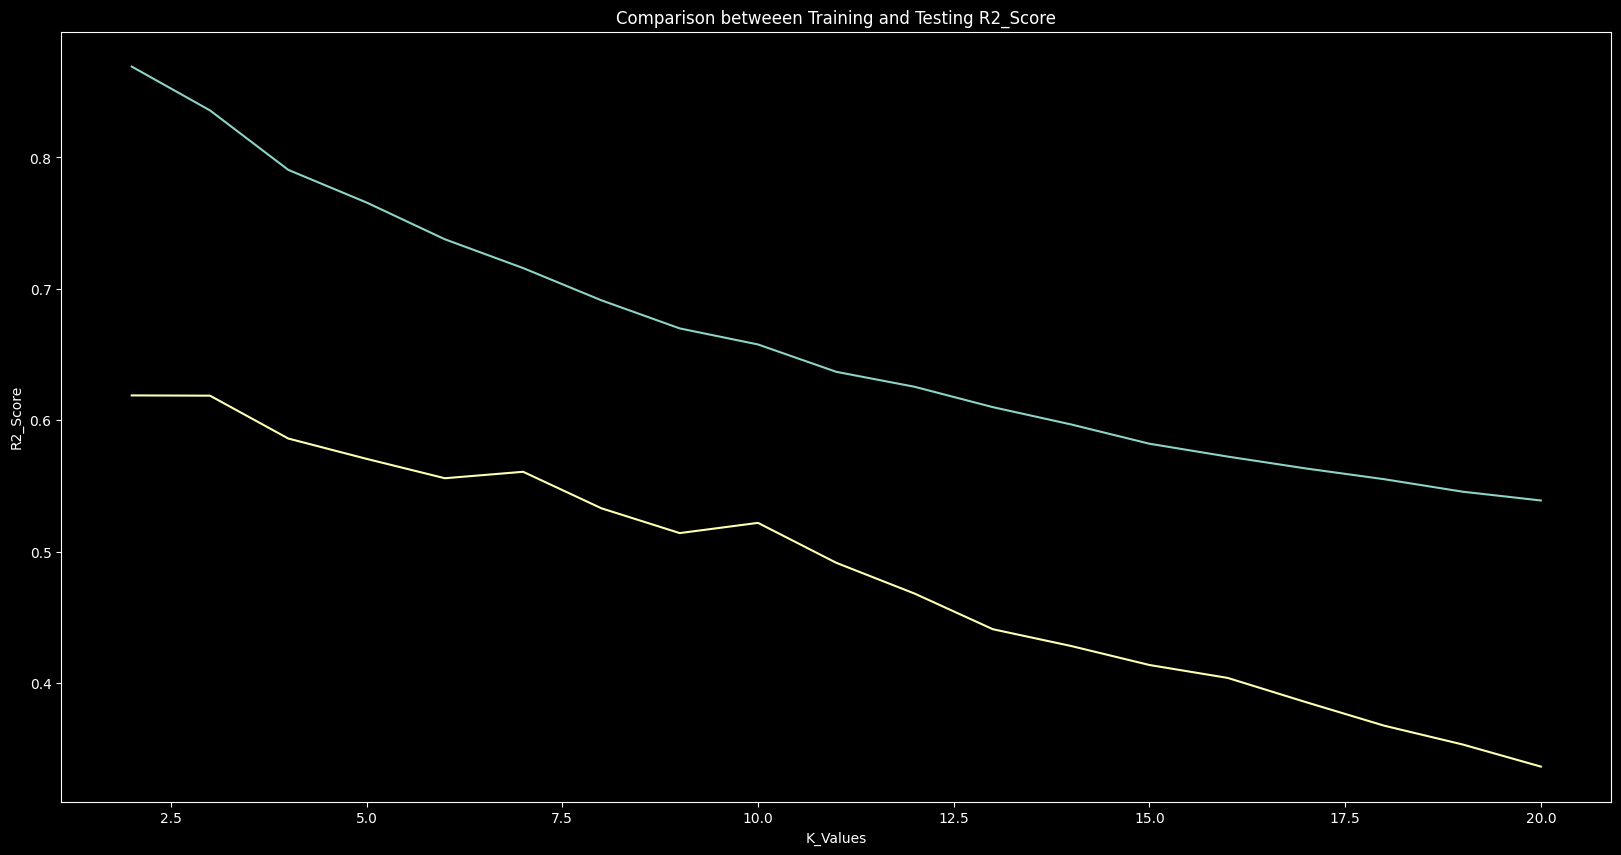

In [99]:
plt.figure(figsize=(20,10))

plt.plot(k_values,r2_train_list_p1)
plt.plot(k_values,r2_testing_list_p1)

plt.xlabel("K_Values")
plt.ylabel("R2_Score")
plt.title("Comparison betweeen Training and Testing R2_Score")


For p=2

Text(0.5, 1.0, 'Comparison between R2 Score of Training and Testing')

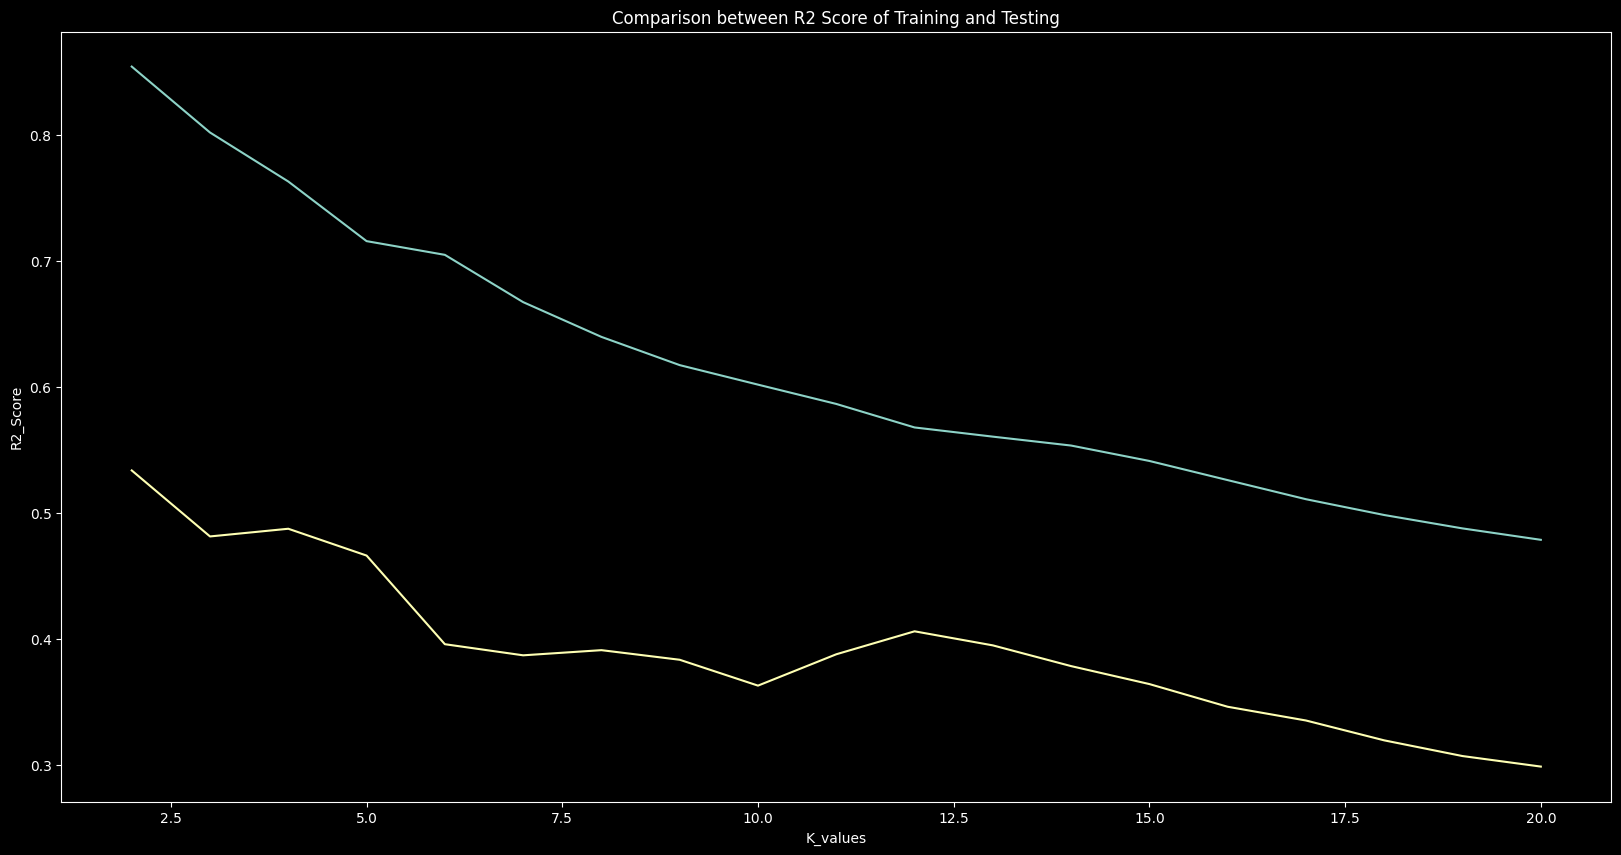

In [100]:
r2_train_list_p2 = []
for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=2)
    knn_reg.fit(x_train,y_train)
    r2_training=knn_reg.score(x_train,y_train)
    r2_train_list_p2.append(r2_training)

r2_train_list_p2

r2_testing_list_p2 = []

for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=2)
    knn_reg.fit(x_train,y_train)
    r2_testing=knn_reg.score(x_test,y_test)
    r2_testing_list_p2.append(r2_testing)

plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list_p2)
plt.plot(k_values,r2_testing_list_p2)
plt.xlabel("K_values")
plt.ylabel("R2_Score")
plt.title("Comparison between R2 Score of Training and Testing")


In [101]:
r2_train_list_p2

[0.8543057075873548,
 0.801972980959533,
 0.7630691901569042,
 0.7157479126337942,
 0.7048588189832153,
 0.6673279820766261,
 0.6397364110499746,
 0.617323182377215,
 0.6018330732687159,
 0.5865103674528525,
 0.5678441310680153,
 0.5605485102773593,
 0.553476345340818,
 0.5412464939103075,
 0.5260406947424876,
 0.5108784453690629,
 0.49833471334232593,
 0.4877051984711944,
 0.47865019616083193]

In [102]:
r2_testing_list_p2

[0.533726391711292,
 0.48132808562905693,
 0.48743309857886086,
 0.4661453519153391,
 0.39578967254720865,
 0.38696622615101517,
 0.39105970473994045,
 0.38343643837345365,
 0.3629051761788489,
 0.38778958313907397,
 0.4060225955232315,
 0.3948561738329023,
 0.3783995182900287,
 0.36413837917208514,
 0.34613259977574395,
 0.3352277262451687,
 0.31945290433613716,
 0.3069978809965901,
 0.29864376555092875]

Model Training 

In [103]:
knn_reg = KNeighborsRegressor(n_neighbors=3,p=1)
knn_reg.fit(x_train,y_train)


KNeighborsRegressor(n_neighbors=3, p=1)

Training Data Evaluation

In [104]:
y_predict_training=knn_reg.predict(x_train)

mse = mean_squared_error(y_train,y_predict_training)
print("Mean squared error: ", mse)
rmse=np.sqrt(mse)
print("Root mean squared error: ", rmse)
mae=mean_absolute_error(y_train,y_predict_training)
print("Mean absolute error: ", mae)
r_squared=r2_score(y_train,y_predict_training)
print("R2 Score : ", r_squared)

Mean squared error:  13.620024752475247
Root mean squared error:  3.6905317709613676
Mean absolute error:  2.6014026402640265
R2 Score :  0.8356423005778576


In [105]:
y_predict_testing = knn_reg.predict(x_test)
mse=mean_squared_error(y_test,y_predict_testing)
print("Mean squared error:",mse)
rmse=np.sqrt(mse)
print("Root Mean Squared Error:",rmse)
mae=mean_absolute_error(y_test,y_predict_testing)
print("Mean absolute error:",mae)
r_squared=r2_score(y_test,y_predict_testing)
print("R2 Score is :",r_squared)

Mean squared error: 34.48779956427015
Root Mean Squared Error: 5.87263140034092
Mean absolute error: 3.6333333333333337
R2 Score is : 0.6185911006264929


Preprocessing

In [106]:
x=df.drop("Price",axis=1)
y=df["Price"]

In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [108]:
x_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666,20.2,349.48,24.91
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307,21.0,395.62,8.47
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666,20.2,2.52,23.29
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.5200,5.836,91.9,2.2110,5,384,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.4640,5.856,42.1,4.4290,3,223,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.4350,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.7400,6.629,94.6,2.1247,24,666,20.2,109.85,23.27


In [109]:
x_train.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.609125,11.569307,10.985050,0.071782,0.556484,6.315891,68.556436,3.808195,9.356436,404.032178,18.318317,356.278342,12.457351
std,8.875058,23.152481,6.894618,0.258447,0.117704,0.709452,27.994922,2.131226,8.589721,166.172655,2.228701,91.566533,7.110381
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.452000,5.890500,45.550000,2.087875,4.000000,279.000000,16.800000,375.472500,6.772500
50%,0.261390,0.000000,8.560000,0.000000,0.538000,6.210000,77.700000,3.175750,5.000000,330.000000,18.700000,391.305000,10.925000
75%,3.202962,20.000000,18.100000,0.000000,0.631000,6.636750,93.650000,5.400800,12.000000,666.000000,20.200000,395.755000,16.372500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


Normalization

In [110]:
# only on training data 
normal_scaling=MinMaxScaler()
normal_scaling.fit(x_train) # we are storing max and min values

normal_train_df=pd.DataFrame(normal_scaling.transform(x_train),columns=x_train.columns)
normal_train_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.168763,0.00,0.642963,0.0,0.471193,0.293065,0.972194,0.088307,1.000000,0.914122,0.808511,0.880428,0.639625
1,0.006950,0.00,0.274074,0.0,0.314815,0.400854,0.552008,0.306359,0.130435,0.229008,0.893617,0.996772,0.185982
2,0.000288,0.35,0.197037,0.0,0.108848,0.440919,0.210093,0.501150,0.000000,0.223282,0.457447,0.912628,0.168322
3,0.079146,0.00,0.642963,0.0,0.471193,0.455562,0.846550,0.081132,1.000000,0.914122,0.808511,0.005547,0.594923
4,0.008056,0.00,0.274074,0.0,0.314815,0.379093,0.685891,0.242514,0.130435,0.229008,0.893617,0.984997,0.263521
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.001822,0.00,0.289630,0.0,0.277778,0.401261,0.916581,0.098337,0.173913,0.375954,0.882979,0.996898,0.467163
400,0.003261,0.20,0.230370,0.0,0.162551,0.405328,0.403708,0.300030,0.086957,0.068702,0.638298,0.979197,0.310982
401,0.000067,0.80,0.047037,0.0,0.102881,0.563758,0.276004,0.656039,0.130435,0.177481,0.468085,0.984972,0.117550
402,0.125342,0.00,0.642963,0.0,0.730453,0.562538,0.944387,0.090489,1.000000,0.914122,0.808511,0.276186,0.594371


Without Hyperparameter tuning

In [111]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(normal_train_df,y_train)

# training 
y_predict_training=knn_reg.predict(normal_train_df)
mse=mean_squared_error(y_train,y_predict_training)
print("Mean squared error: ",mse)
rmse=np.sqrt(mse)
print("Root mean squared error: ",rmse)
mae=mean_absolute_error(y_train,y_predict_training)
print("Mean absolute error: ",mae)
r_squared=r2_score(y_train,y_predict_training)
print("R2 Score is : ",r_squared)

Mean squared error:  13.918433663366336
Root mean squared error:  3.730741704187833
Mean absolute error:  2.421188118811881
R2 Score is :  0.8397848702909227


In [112]:
x_test

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296,16.6,395.50,9.04
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254,17.6,396.90,3.53
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,18.81100,0.0,18.10,0,0.597,4.628,100.0,1.5539,24,666,20.2,28.79,34.37
436,14.42080,0.0,18.10,0,0.740,6.461,93.3,2.0026,24,666,20.2,27.49,18.05
411,14.05070,0.0,18.10,0,0.597,6.657,100.0,1.5275,24,666,20.2,35.05,21.22
86,0.05188,0.0,4.49,0,0.449,6.015,45.1,4.4272,3,247,18.5,395.99,12.86


In [113]:
array = normal_scaling.transform(x_test)
normal_testing_df=pd.DataFrame(array,columns=x_test.columns)
normal_testing_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.000930,0.0,0.122593,0.0,0.257202,0.519219,0.836251,0.137921,0.173913,0.208015,0.425532,0.996470,0.201711
1,0.000533,0.4,0.210000,1.0,0.127572,0.588774,0.308960,0.268076,0.130435,0.127863,0.531915,1.000000,0.049669
2,0.001087,0.0,1.000000,0.0,0.460905,0.431157,0.987642,0.067155,0.130435,1.000000,0.797872,0.982879,0.450883
3,0.000928,0.0,0.372963,0.0,0.057613,0.447834,0.050463,0.378079,0.130435,0.225191,0.702128,0.984896,0.104581
4,0.057112,0.0,0.642963,0.0,0.674897,0.495017,0.915551,0.112632,1.000000,0.914122,0.808511,0.970220,0.428808
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.211336,0.0,0.642963,0.0,0.436214,0.155583,1.000000,0.038584,1.000000,0.914122,0.808511,0.071789,0.900662
98,0.161989,0.0,0.642963,0.0,0.730453,0.528371,0.930999,0.079386,1.000000,0.914122,0.808511,0.068511,0.450331
99,0.157830,0.0,0.642963,0.0,0.436214,0.568233,1.000000,0.036183,1.000000,0.914122,0.808511,0.087574,0.537804
100,0.000481,0.0,0.138889,0.0,0.131687,0.437665,0.434604,0.299866,0.086957,0.114504,0.627660,0.997705,0.307119


Testing Data Evaluation 

In [114]:
y_predict_testing=knn_reg.predict(normal_testing_df)
mse=mean_squared_error(y_test,y_predict_testing)
print("Mean squared error: ", mse)
rmse=np.sqrt(mse)
print("Root mean squared error: ", rmse)
mae=mean_absolute_error(y_test,y_predict_testing)
print("Mean absolute error: ", mae)
r_squared=r2_score(y_test,y_predict_testing)
print("R2 Score is : ", r_squared)

Mean squared error:  21.7121843137255
Root mean squared error:  4.659633495643783
Mean absolute error:  2.6566666666666676
R2 Score is :  0.7039265754739785


Find Best Value of K

for p=1

Text(0.5, 1.0, 'Comaprison of R2 SCore of Training and Testing')

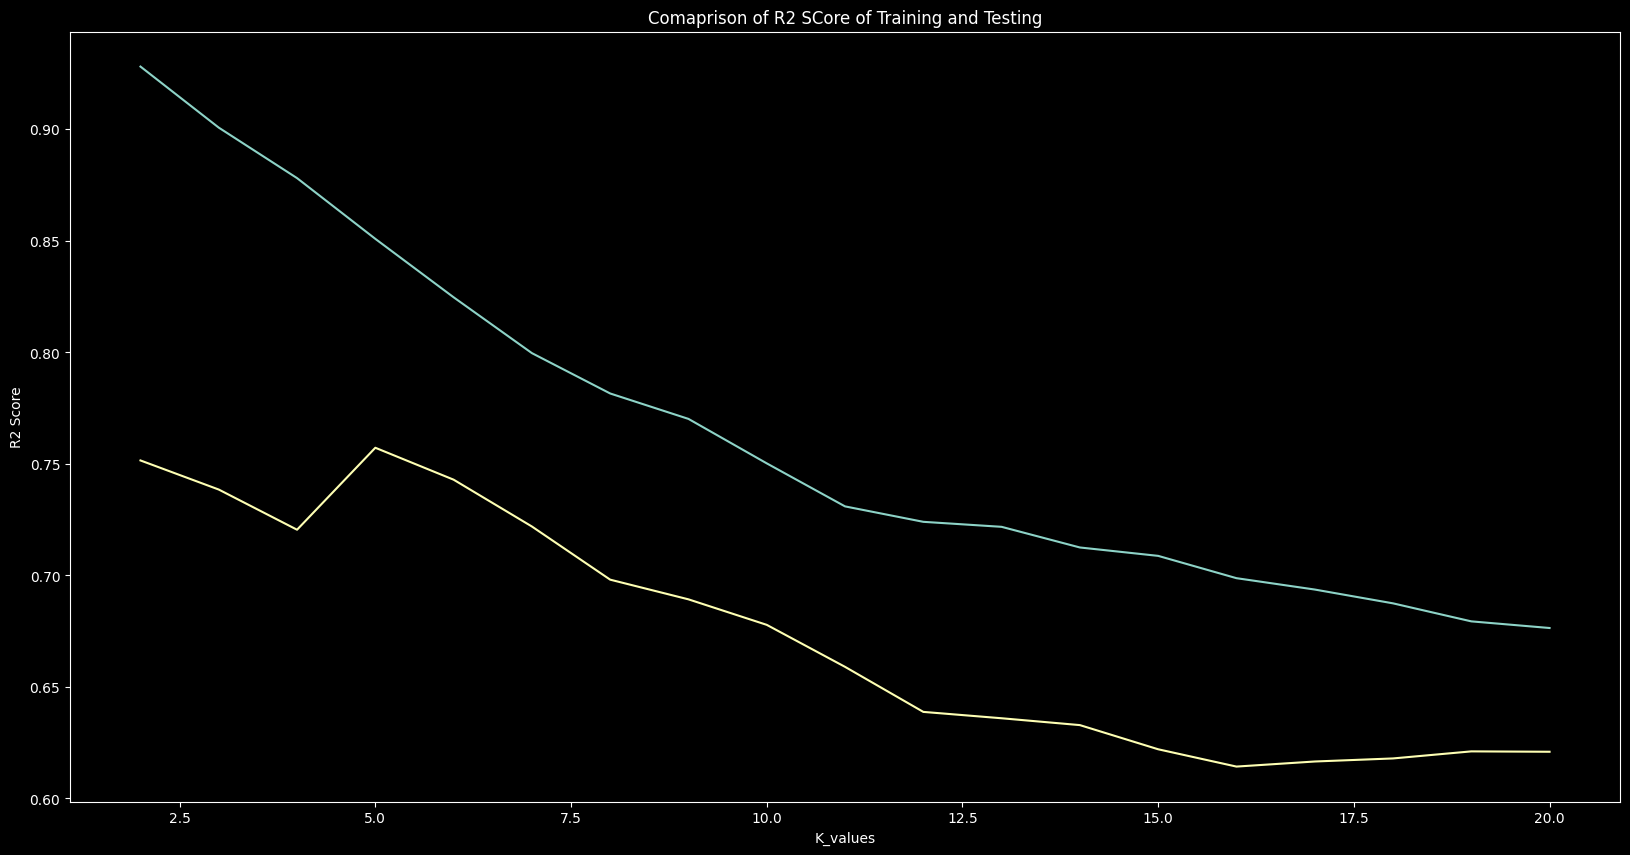

In [115]:
r2_train_list_p1 = []
r2_testing_list_p1 = []

for k in k_values:
    knn_reg=KNeighborsRegressor(n_neighbors=k,p=1)
    knn_reg.fit(normal_train_df,y_train)
    r2_training=knn_reg.score(normal_train_df,y_train)
    r2_train_list_p1.append(r2_training)
    r2_testing=knn_reg.score(normal_testing_df,y_test)
    r2_testing_list_p1.append(r2_testing)

plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list_p1)
plt.plot(k_values,r2_testing_list_p1)

plt.xlabel("K_values")
plt.ylabel("R2 Score")
plt.title("Comaprison of R2 SCore of Training and Testing")

In [116]:
r2_train_list_p1

[0.9280662757584184,
 0.9007005047816236,
 0.8780689898883693,
 0.850844687427172,
 0.8246545808239405,
 0.7996261427088135,
 0.7815301853954154,
 0.770138119165818,
 0.7502110071428729,
 0.7309222619310995,
 0.7240024893458957,
 0.7217605103429905,
 0.7125037167727479,
 0.708741317861058,
 0.698742698670684,
 0.6936512476696334,
 0.6874588734024416,
 0.6793819017318778,
 0.6764039049384574]

In [117]:
r2_testing_list_p1

[0.751514558970148,
 0.7384695186676269,
 0.7204603544032995,
 0.7572046978636022,
 0.7428910230374841,
 0.7219077682439443,
 0.6980772196427232,
 0.6892548274828252,
 0.6778224842596907,
 0.6589949873818817,
 0.6388022471542631,
 0.6359495719471637,
 0.6328798984294706,
 0.6220490384954649,
 0.6142883629906368,
 0.6165648531493659,
 0.6179384654064438,
 0.6211026100545359,
 0.6209315698598263]

For p=2

Text(0.5, 1.0, 'Comparison of R2 Score between Training and Testing')

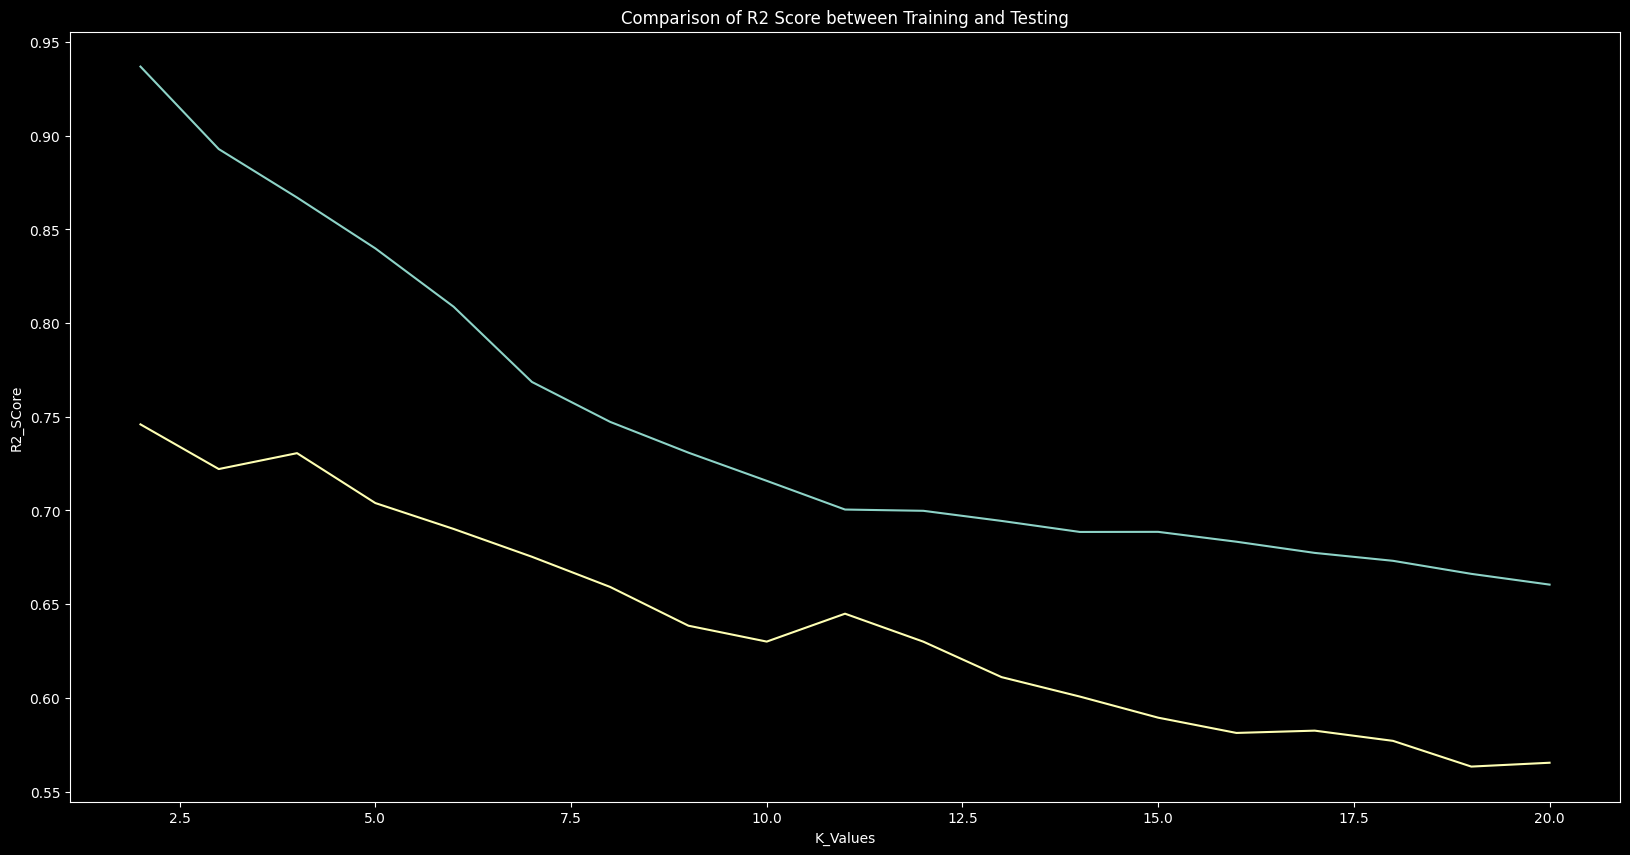

In [118]:
r2_train_list_p2 = []
r2_testing_list_p2 = []

for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=2)
    knn_reg.fit(normal_train_df,y_train)
    r2_training=knn_reg.score(normal_train_df,y_train)
    r2_train_list_p2.append(r2_training)
    r2_testing=knn_reg.score(normal_testing_df,y_test)
    r2_testing_list_p2.append(r2_testing)

plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list_p2)
plt.plot(k_values,r2_testing_list_p2)
plt.xlabel("K_Values")
plt.ylabel("R2_SCore")
plt.title("Comparison of R2 Score between Training and Testing")


In [119]:
r2_train_list_p2

[0.9367833673241835,
 0.8927713359797099,
 0.8669167442428913,
 0.8397848702909227,
 0.8086707492285344,
 0.768540335247833,
 0.747226132513602,
 0.7308066081276439,
 0.7157722434734406,
 0.7004628847993376,
 0.6997901961467947,
 0.6943894307262262,
 0.6885081864183178,
 0.6885604834465479,
 0.6832974802470912,
 0.6773275303609401,
 0.6731109715053336,
 0.6661539051387968,
 0.6604119429058207]

In [120]:
r2_testing_list_p2

[0.7458936041442967,
 0.7220667672322656,
 0.7305462718143125,
 0.7039265754739785,
 0.6901095211904174,
 0.6752726455950537,
 0.6591603669484412,
 0.6384884359066074,
 0.6300120288661331,
 0.644898110047885,
 0.6299831167588693,
 0.6110548728967771,
 0.6006780947004289,
 0.5894271470950224,
 0.5812827844058915,
 0.5825023758944246,
 0.5770543579009693,
 0.5633316184875571,
 0.565380035613182]

After Normalisation And hyperparameter tuning best value for kneighbours is 5 and p is 1 

Now for standard Scalar

In [121]:
# only on training data 
std_scaling=StandardScaler()
std_scaling.fit(x_train)   # We are storing Maximum and Minimum values

std_train_df=pd.DataFrame(std_scaling.transform(x_train),columns=x_train.columns)
std_train_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.387850,-0.500320,-0.352167,-0.278089,-0.310348,-0.677264,0.834884,-0.750355,-0.507797,-0.120700,1.159817,0.430731,0.873419
400,-0.373414,0.364589,-0.584520,-0.278089,-0.786706,-0.649038,-0.946216,0.291651,-0.740922,-1.090773,0.126546,0.353970,0.076412
401,-0.405470,2.959318,-1.303361,-0.278089,-1.033391,0.450354,-1.389703,2.130899,-0.624360,-0.747331,-0.592251,0.379010,-0.910692
402,0.851897,-0.500320,1.033237,-0.278089,1.561057,0.441886,0.931450,-0.790898,1.706891,1.578434,0.845343,-2.694586,1.522570


In [122]:
array = std_scaling.transform(x_test)
std_testing_df=pd.DataFrame(array,columns=x_test.columns)
std_testing_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,-0.396809,-0.500320,-1.007111,-0.278089,-0.395412,0.141282,0.555916,-0.545853,-0.507797,-0.650926,-0.771951,0.428872,-0.481210
1,-0.400796,1.229499,-0.664391,3.595975,-0.931315,0.623942,-1.275254,0.126565,-0.624360,-0.903989,-0.322703,0.444180,-1.257094
2,-0.395234,-0.500320,2.433163,-0.278089,0.446720,-0.469805,1.081663,-0.911447,-0.624360,1.849573,0.800418,0.369934,0.790338
3,-0.396825,-0.500320,-0.025421,-0.278089,-1.220532,-0.354079,-2.172957,0.694876,-0.624360,-0.596698,0.396095,0.378682,-0.976875
4,0.167084,-0.500320,1.033237,-0.278089,1.331384,-0.026661,0.831307,-0.676503,1.706891,1.578434,0.845343,0.315043,0.677687
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,1.715000,-0.500320,1.033237,-0.278089,0.344643,-2.382098,1.124581,-1.059057,1.706891,1.578434,0.845343,-3.580942,3.085604
98,1.219719,-0.500320,1.033237,-0.278089,1.561057,0.204790,0.884955,-0.848260,1.706891,1.578434,0.845343,-3.595156,0.787522
99,1.177967,-0.500320,1.033237,-0.278089,0.344643,0.481403,1.124581,-1.071460,1.706891,1.578434,0.845343,-3.512491,1.233902
100,-0.401311,-0.500320,-0.943214,-0.278089,-0.914302,-0.424644,-0.838921,0.290806,-0.740922,-0.946166,0.081621,0.434230,0.056698


To find Best value of k

For p=1

Text(0.5, 1.0, 'Comparison of R2_Score of Training and Testing')

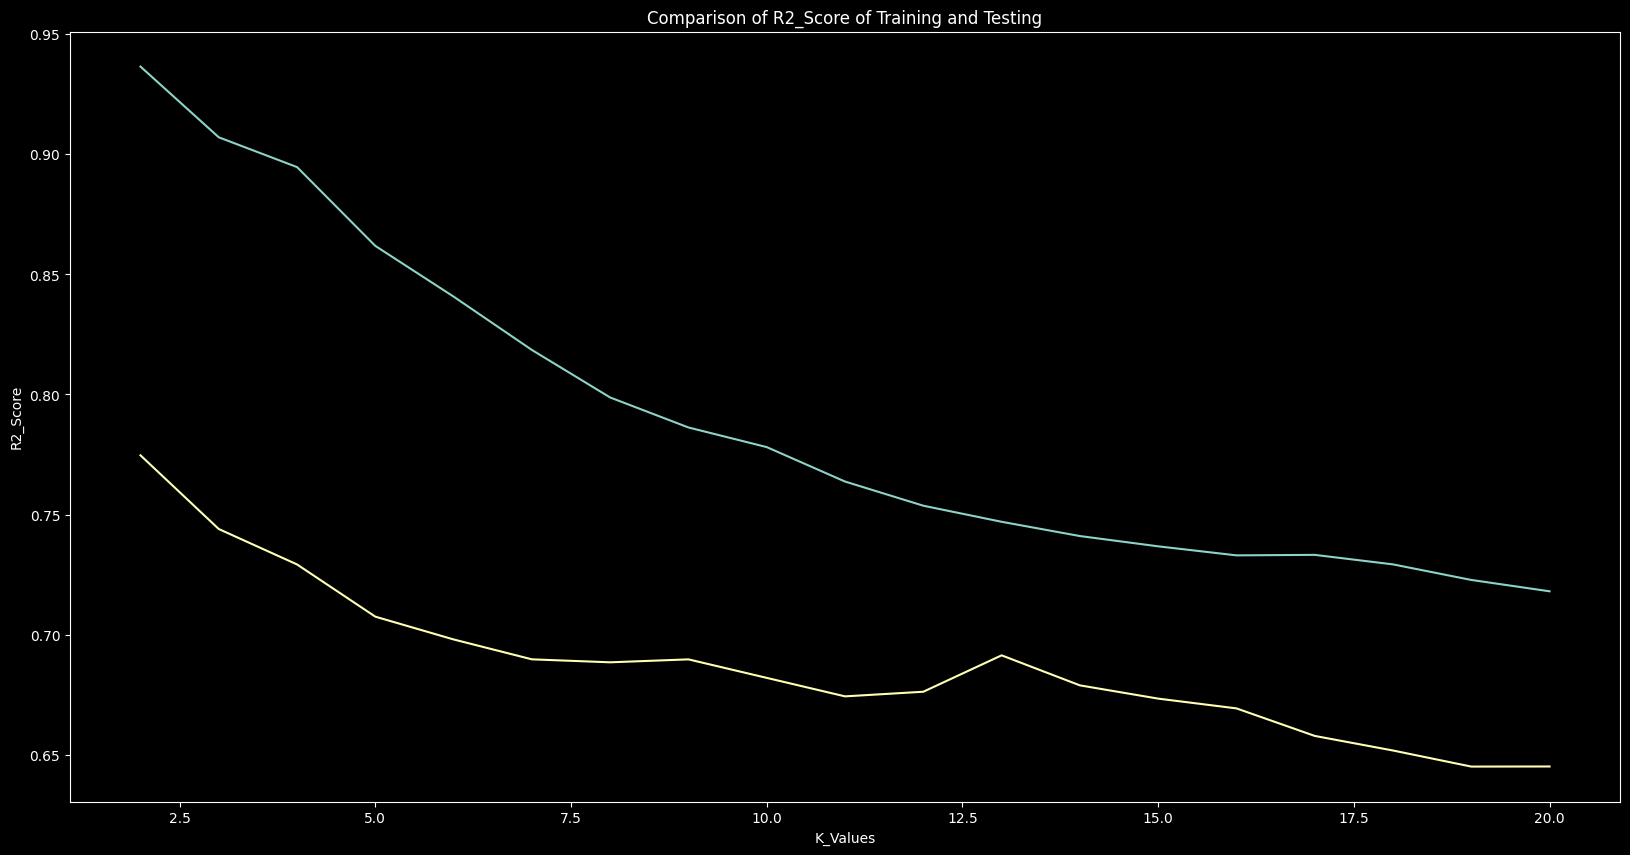

In [123]:
r2_train_list_p1 = []
r2_testing_list_p1 = []
for k in k_values:
    knn_reg=KNeighborsRegressor(n_neighbors=k,p=1)
    knn_reg.fit(std_train_df,y_train)
    r2_training=knn_reg.score(std_train_df,y_train)
    r2_train_list_p1.append(r2_training)
    r2_testing=knn_reg.score(std_testing_df,y_test)
    r2_testing_list_p1.append(r2_testing)

plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list_p1)
plt.plot(k_values,r2_testing_list_p1)
plt.xlabel("K_Values")
plt.ylabel("R2_Score")
plt.title("Comparison of R2_Score of Training and Testing")


In [124]:
r2_train_list_p1

[0.9364334784253624,
 0.9070131628105815,
 0.8946087018524074,
 0.8618230157807967,
 0.840723375713973,
 0.8185294585748102,
 0.7987580555262691,
 0.7862774112096436,
 0.778110783229832,
 0.7637826829898033,
 0.7537283720663066,
 0.7470411887381843,
 0.7411050990669974,
 0.7368257689305384,
 0.7330689768789318,
 0.733278131350653,
 0.7293156414721041,
 0.7228394134663549,
 0.7181165539437616]

In [125]:
r2_testing_list_p1

[0.7746938953976218,
 0.7440324673133406,
 0.7292910990322645,
 0.7075653766829679,
 0.6980834398957148,
 0.6898106989483097,
 0.6885716379098963,
 0.6897969777190346,
 0.6820955462840036,
 0.67440321036457,
 0.6763249856467799,
 0.6914735724062722,
 0.6789835321962046,
 0.6734653897740063,
 0.6694045700696787,
 0.6579494039889084,
 0.6518754477696234,
 0.6451890162954079,
 0.6452308024927182]

For p=2

Text(0.5, 1.0, 'Comparison of R2 Score of Training and Testing')

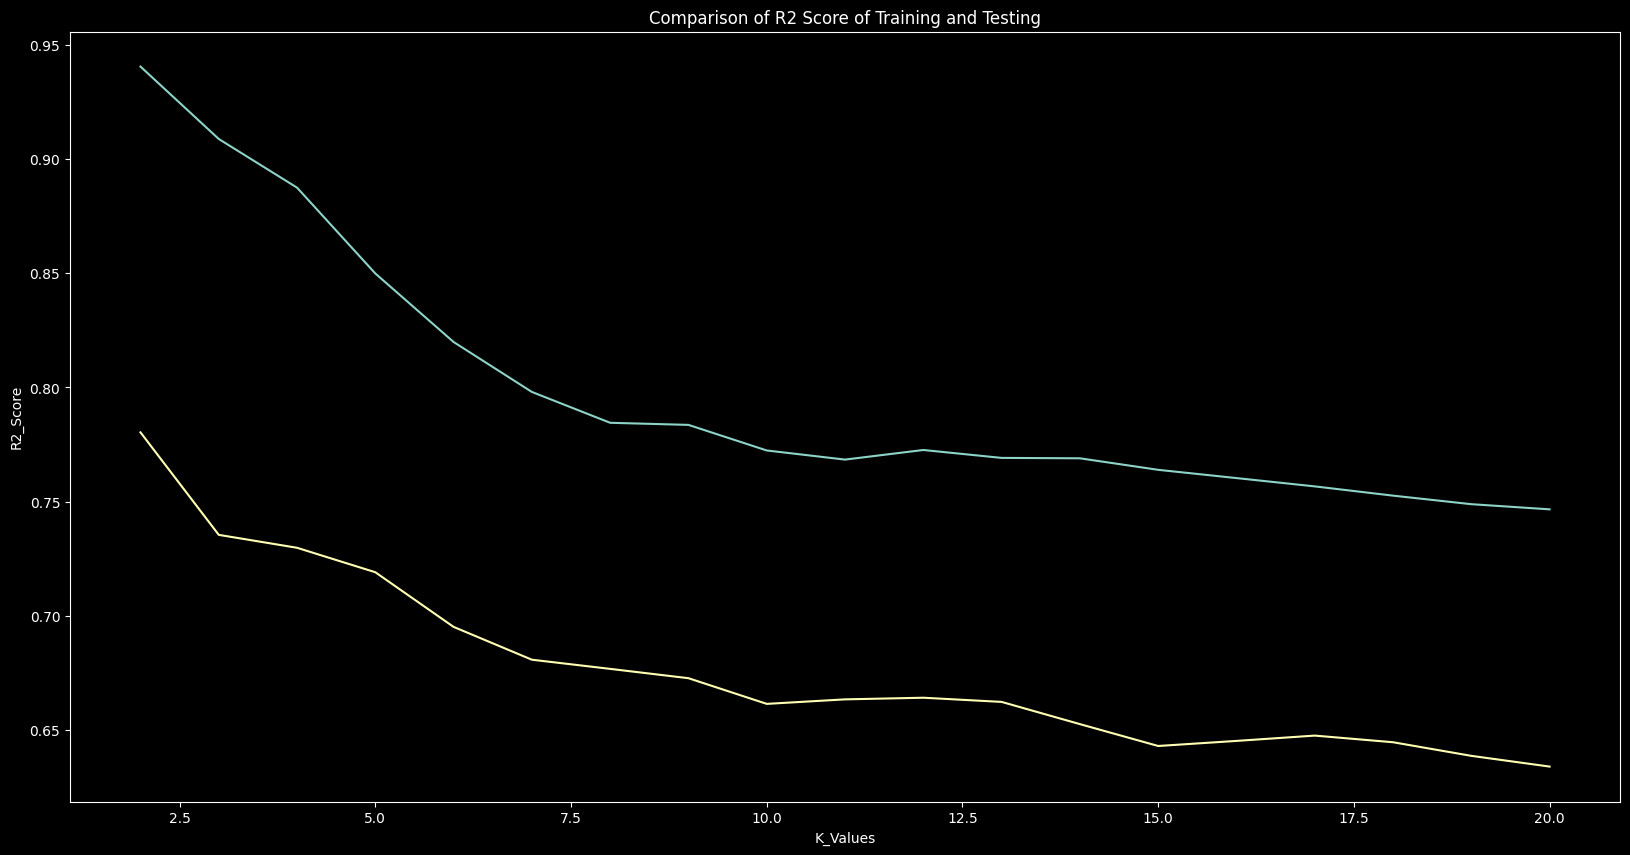

In [126]:
r2_train_list_p2 = []
r2_testing_list_p2 = []
for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=2)
    knn_reg.fit(std_train_df,y_train)
    r2_training=knn_reg.score(std_train_df,y_train)
    r2_train_list_p2.append(r2_training)
    r2_testing=knn_reg.score(std_testing_df,y_test)
    r2_testing_list_p2.append(r2_testing)

plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list_p2)
plt.plot(k_values,r2_testing_list_p2)
plt.xlabel("K_Values")
plt.ylabel("R2_Score")
plt.title("Comparison of R2 Score of Training and Testing")

In [127]:
r2_train_list_p2

[0.9405323499450828,
 0.9088152869217375,
 0.887499286380732,
 0.8498933657244521,
 0.8198774196616696,
 0.7979989372034568,
 0.784489665299255,
 0.7835685054210264,
 0.7723590428204482,
 0.7683677468547307,
 0.7725714124337374,
 0.7691090470336954,
 0.7689333744166457,
 0.7638851898888851,
 0.760268571553026,
 0.7566289523046927,
 0.752576309496112,
 0.7488311070167017,
 0.7465745203562384]

In [128]:
r2_testing_list_p2

[0.780299141763679,
 0.7353977906290499,
 0.729732690574877,
 0.7190172315709293,
 0.6950743228812812,
 0.6806997377008599,
 0.6766861200737366,
 0.672600773700395,
 0.6613535344781623,
 0.6633295168552016,
 0.6640483229839683,
 0.66221862576062,
 0.652488442070691,
 0.6429063199448062,
 0.6451282473480621,
 0.6474585860792095,
 0.6445499249352176,
 0.6385861933903949,
 0.6338839503029159]

After Standardization best value for k nearest neighbors is 2 and p is 2

After normalization and Standardization best value for k nearest neighbors is 5 and p=1.
Above Best values are obtained by Normalization 